In [2]:
# Imports
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
X_numpy , y_numpy = datasets.make_regression(n_samples = 100,n_features=1,noise=20,random_state =42)

In [4]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [8]:
y = y.view(y.shape[0],1)

In [11]:
print(y.shape)

torch.Size([100, 1])


In [12]:
nsamples,nfeatures = X.shape

In [13]:
input_size = nfeatures
output_size = 1

# Model initialization

In [32]:
model = nn.Linear(input_size,output_size)

## Loss and optimizer

In [33]:
learning_rate = 0.01
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate,weight_decay=0.002)

## Training Loop

In [34]:
epochs = 200

print("[INFO] Training started...")
for epoch in range(epochs):
    
    #Y_prediction
    y_pred = model(X)
    
    #loss calculation
    l = loss(y,y_pred)
    
    #Compute the gradient
    l.backward()
    
    #Weight updation
    optimizer.step()
    
    #Zeroing the grad to keep it out of the computational graph
    optimizer.zero_grad()
    
    if (epoch +1)%20==0:
        print(f"[INFO] Epoch: {epoch }, loss : {l.item():.3f}")

[INFO] Training started...
[INFO] Epoch: 19, loss : 1252.209
[INFO] Epoch: 39, loss : 797.411
[INFO] Epoch: 59, loss : 564.260
[INFO] Epoch: 79, loss : 443.890
[INFO] Epoch: 99, loss : 381.359
[INFO] Epoch: 119, loss : 348.697
[INFO] Epoch: 139, loss : 331.554
[INFO] Epoch: 159, loss : 322.515
[INFO] Epoch: 179, loss : 317.729
[INFO] Epoch: 199, loss : 315.185


## Plotting

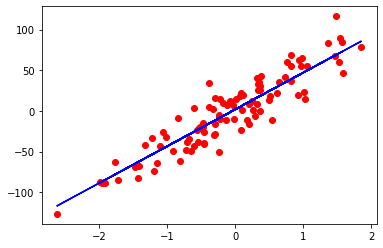

In [35]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()